# Создание данных измерений с шумом.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

Имеется ряд последовательных измерений функции $p(t)$. Требуется максимально точно вычислить $p'(t)$.
В качестве примера рассмотрим
$$
p(t) = \frac{p_0}{1 + \frac{t}{t_0}}.
$$
Добавим к измерениям шум.

In [3]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2;

Text(0, 0.5, 'p')

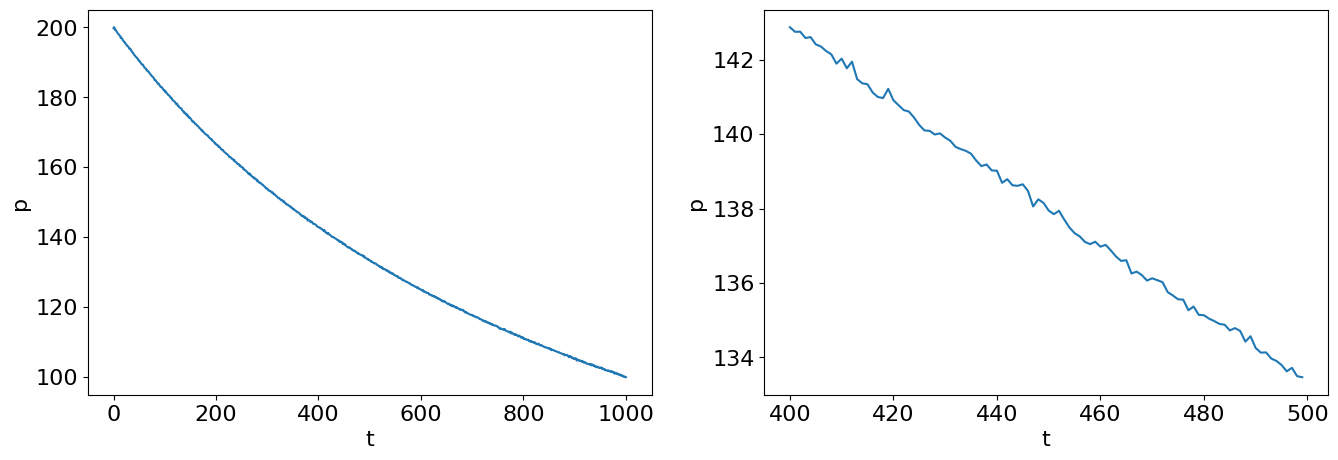

In [4]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p)
plt.xlabel('t'); plt.ylabel('p')
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500])
plt.xlabel('t'); plt.ylabel('p')

# Конечные разности

Простейший способ численно продифференцировать табличную функцию &mdash; вычислить конечную разность.
Рассмотрим две стандартные формулы для вычисления
$$
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_i)}{t_{i+1} - t_i}\\
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_{i-1})}{t_{i+1} - t_{i-1}}
$$

Отметим, что формулы дифференцирования позволяют найти производную не в каждой точке $t_i$ (кроме некоторых крайних точек). Для дифференцирования в этих точках нужно использовать другие формулы. Сейчас мы не будем на это обращать внимание, просто будем считать производную там, где получится.

In [5]:
def diff1(t, p):
    # Функция np.diff возвращает массив соседних разностей - как раз то, что нужно
    return np.diff(p) / np.diff(t)

def diff2(t, p):
    # Разность через одну точку удобнее считать с помощью операций с частями массива
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])

def left_difference (X,Y,x):
  point_index = X.index(x)
  step =X[point_index] - X[point_index - 1]
  first_derivative = (Y[point_index] - Y[point_index - 1])/ step
  second_derivative = (Y[point_index] - 2*Y[point_index - 1] + Y[point_index - 2])/( step ** 2)
  return (first_derivative, second_derivative)

def right_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index])/ step
  second_derivative = (Y[point_index + 2] - 2*Y[point_index + 1] + Y[point_index])/( step ** 2)
  return (first_derivative, second_derivative)

def central_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index - 1])/ (2*step)
  second_derivative = (Y[point_index + 2] - 2*Y[point_index] + Y[point_index - 2])/(4* (step ** 2))
  return (first_derivative, second_derivative)


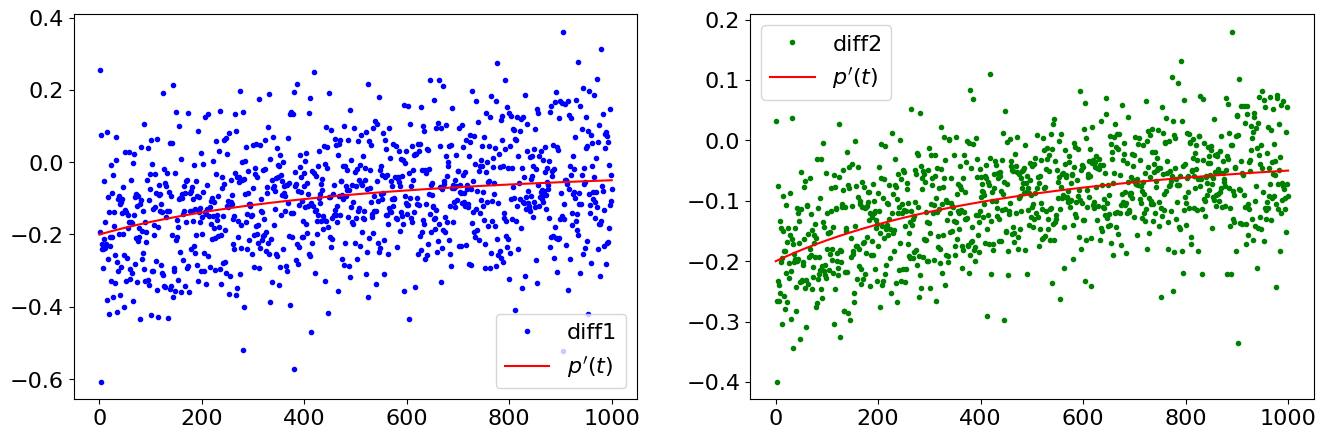

In [6]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:], diff1(t, p), 'b.', label="diff1")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')

Видно, что формула второго порядка дает результаты, которые ближе к точному значению. Объясняется ли это тем, что вторая формула имеет второй порядок аппроксимации, а вторая &mdash; лишь первый?

Вспомним, что при численном дифференцировании имеется два источника ошибок &mdash; первая связана с приближенным характером конечной разности (ошибка метода или ошибка аппроксимации), а вторая &mdash; с погрешностью в значениях $p(t_i)$ (ошибка вычислений).

Пусть $\tau = t_{i+1} - t_i$, а $M_k$ &mdash; максимум $k$-й производной функции $p(t)$.

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $\frac{M_2 \tau}{2}$  | $ \frac{2\Delta p}{\tau} $ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $\frac{M_3 \tau^2}{6}$  | $\frac{2\Delta p}{2\tau} = \frac{\Delta p}{\tau}$  |

Подставим конкретные значения: $\tau = 1, \Delta p \approx 0.3$ (3 стандартных отклонения). В качестве оценок для максимума возьмем
$$
M_k = \frac{p_0 k!}{t_0^k}
$$
Это значение можно получить из разложения
$$
\frac{p_0}{1 - t/t_0} =
\sum_{k=0}^\infty (-1)^k \frac{p_0 k!}{t_0^k} \frac{t^k}{k!}
$$

Подставляя эти значения, получаем

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $2\cdot 10^{-4}$  | $0.6$ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $2\cdot 10^{-7}$  | $0.3$  |

В данном случае погрешность, связанная с неточным заданием $p(t_i)$, на много порядков превосходит погрешность метода. Как же уменьшить эту ошибку? Достаточно взять две более удаленные точки, например
$$
p'(x_i) \approx \frac{p(t_{i+10}) - p(t_{i-10})}{t_{i+10} - t_{i-10}}
$$

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+10} - p_{i-10}}{20\tau}$  | $\frac{M_3 (10\tau)^2}{6} \approx 2 \cdot 10^{-5}$  | $\frac{2\Delta p}{20\tau} = \frac{\Delta p}{10\tau} \approx 0.03$  |

In [7]:
def diff20(t, p):
    h = 36
    h_2 = 18
    return (p[h:] - p[:-h]) / (t[h:] - t[:-h])

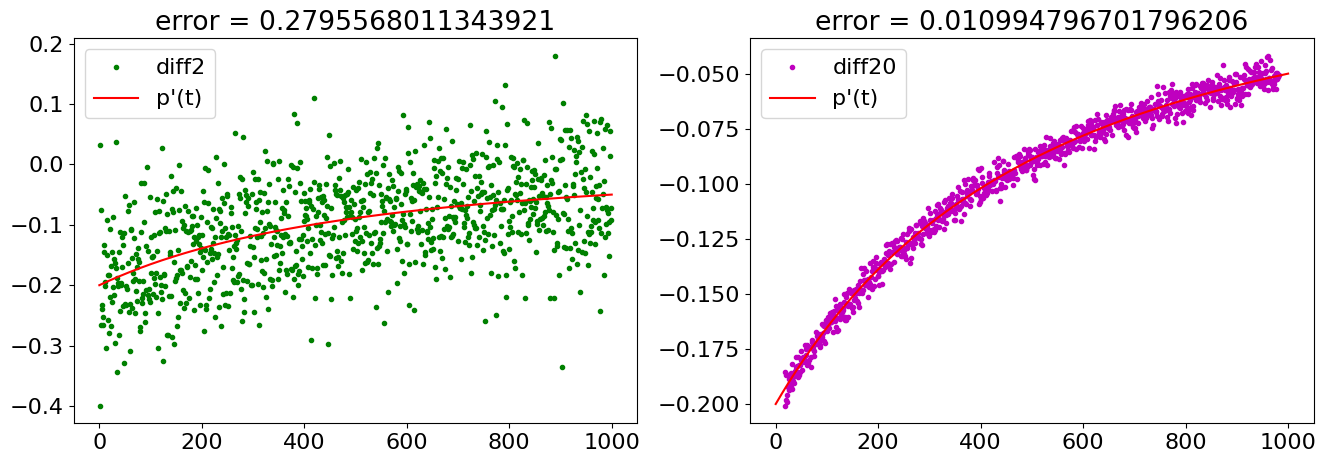

In [8]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[18:-18], diff20(t, p), 'm.', label="diff20")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff20(t, p) - pprime[18:-18]).max()))
plt.legend(loc='best')

Видно, что расстояние в 20 точек сработало гораздо лучше расстояния в 2 точки. Но оптимально ли это число?

## Задание 1.



Теоретически найти оптимальное расстояние (имеющее минимальную оценку для суммарной ошибки) между точками, используемыми для вычисления производной. Сравнить фактическую ошибку с теоретической оценкой.

# Сглаживание данных



Несколько другой подход к данной задаче заключается в предварительной очистке данных от шума. Для этого можно попытаться описать данные какой-либо простой зависимостью, а параметры зависимости подогнать по методу наименьших квадратов. Для этого служит функция **np.polyfit**, которая приближает данные многочленом заданной небольшой степени.

In [9]:
# Подогнать данные (t_i, p_i) многочленом пятой степени
# full=True дает доступ к расширенной информации - ошибке приближения
# *_ - отбрасывает все лишние результаты, после первых двух
coeff, [err], *_ =  np.polyfit(t, p, 5, full=True)

Чтобы вычислить полученный многочлен в заданной точке (точках) можно использовать
**np.polyval**

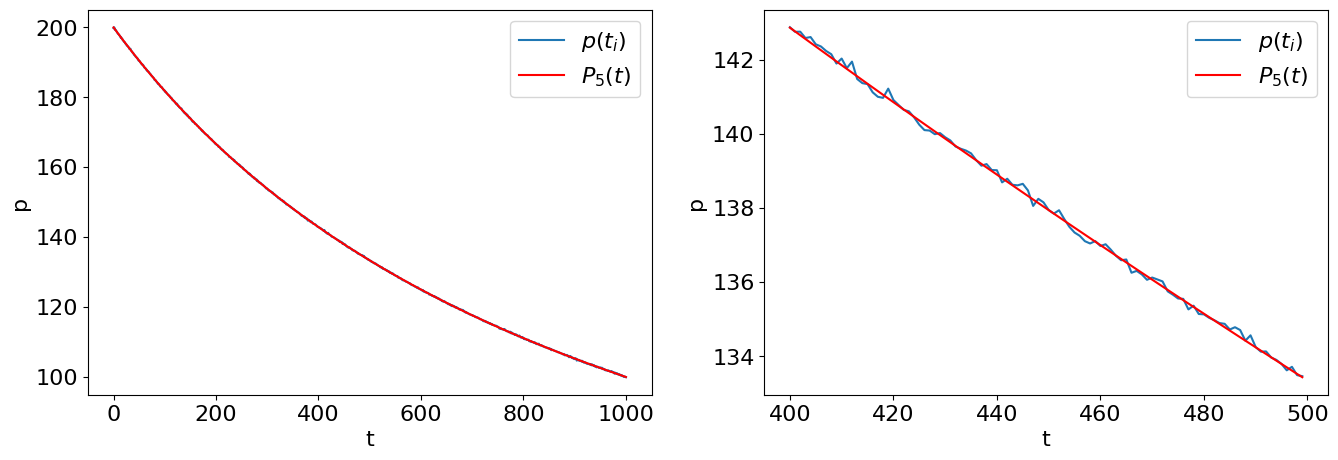

In [10]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p, label='$p(t_i)$')
plt.plot(t, np.polyval(coeff, t), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500], label='$p(t_i)$')
plt.plot(t[400:500], np.polyval(coeff, t[400:500]), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Как же определить оптимальный порядок аппроксимирующего многочлена? Слишком маленький порядок не сможет хорошо приблизить данные, а слишком большой будет приближать данные вместе с шумом. В машинном обучении эта проблема назвается компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике ошибки в зависимости от степени многочлена.

Text(0, 0.5, '$\\sum r_i^2$')

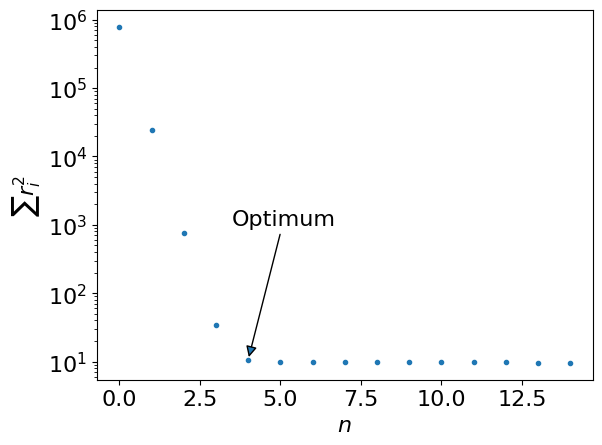

In [11]:
degs = list(range(0, 15))
errs = []
for deg in degs:
    # Сейчас нас интересует только ошибка приближения
    _, [err], *_ =  np.polyfit(t, p, deg, full=True)
    errs.append(err)

plt.semilogy(degs, errs, '.')
plt.annotate("Optimum", xy=(degs[4], errs[4]), xytext=(3.5, 1e3),
             arrowprops={"arrowstyle":"-|>"})
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

Итак, оптимальная степень многочлена &mdash; 4. В этот раз для вычисления многочлена превратим набор коэффициентов в объект **np.poly1d**.

In [12]:
P4_coeff = np.polyfit(t, p, deg=4) # Получаем с помощью polyfit коэффициенты
P4 = np.poly1d(P4_coeff)           # Превращаем в poly1d
P4der = P4.deriv(m=1)              # poly1d умеет вычислять свои производные

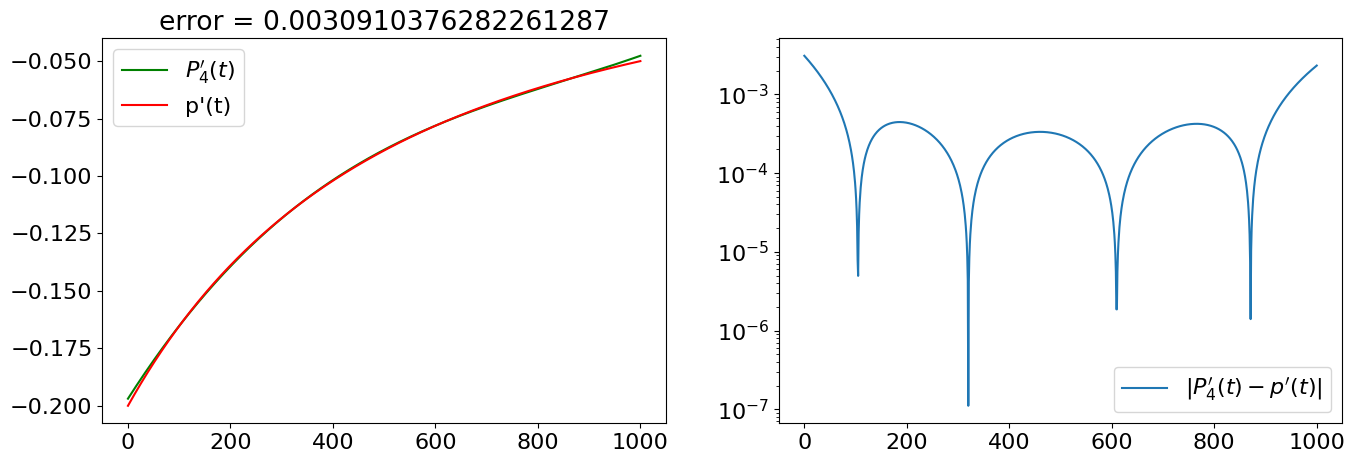

In [13]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, P4der(t), 'g-', label="$P_4'(t)$")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(P4der(t) - pprime).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.semilogy(t, np.abs(P4der(t) - pprime), label="$|P_4'(t) - p'(t)|$")
plt.legend(loc='best')

# Сглаживание сплайном


Не всегда даже гладкие данные могут быть хорошо описаны многочленом. Особенно плохо приближаются осциллирующие данные. В этом случае приближение многочленом может быть заменено на приближение сплайном - кусочно заданным многочленом, у которого на каждом куске отрезка - своя степень. Максимальная степень на отрезке, называется степенью сплайна.

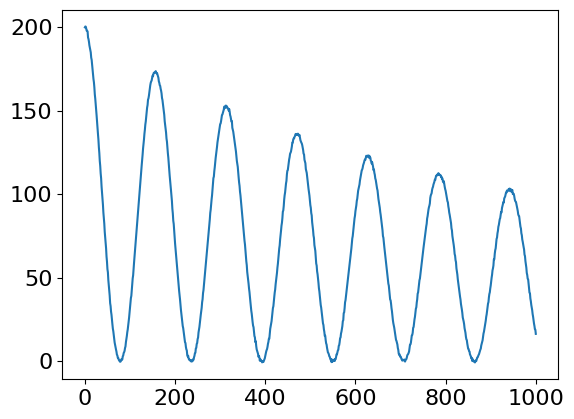

In [14]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)

Попробуем снова приближать многочленами разных степеней. В этом случае характерного излома не наблюдается.

Text(0, 0.5, '$\\sum r_i^2$')

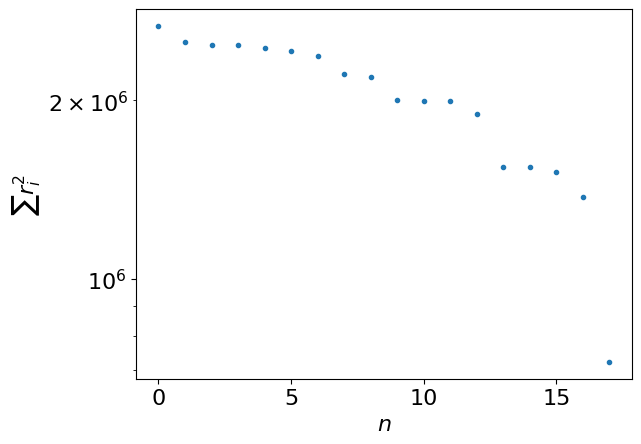

In [15]:
degs = list(range(0, 18))
errs = []
for deg in degs:
    _, [err], *_ =  np.polyfit(t, u, deg, full=True)
    errs.append(err)

plt.semilogy(degs, errs, '.')
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

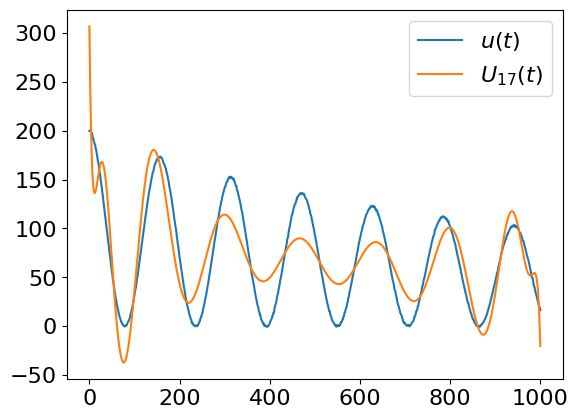

In [16]:
U17 = np.poly1d(np.polyfit(t, u, deg=17))
plt.plot(t, u, label='$u(t)$')
plt.plot(t, U17(t), label='$U_{17}(t)$')
plt.legend(loc='best')

Многочлен приближает данные отвратительно. Приблизим данные сплайном. Для этого воспользуемся возможностями библиотеки **scipy**

In [17]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

In [18]:
Uint = InterpolatedUnivariateSpline(t, u, k=3)

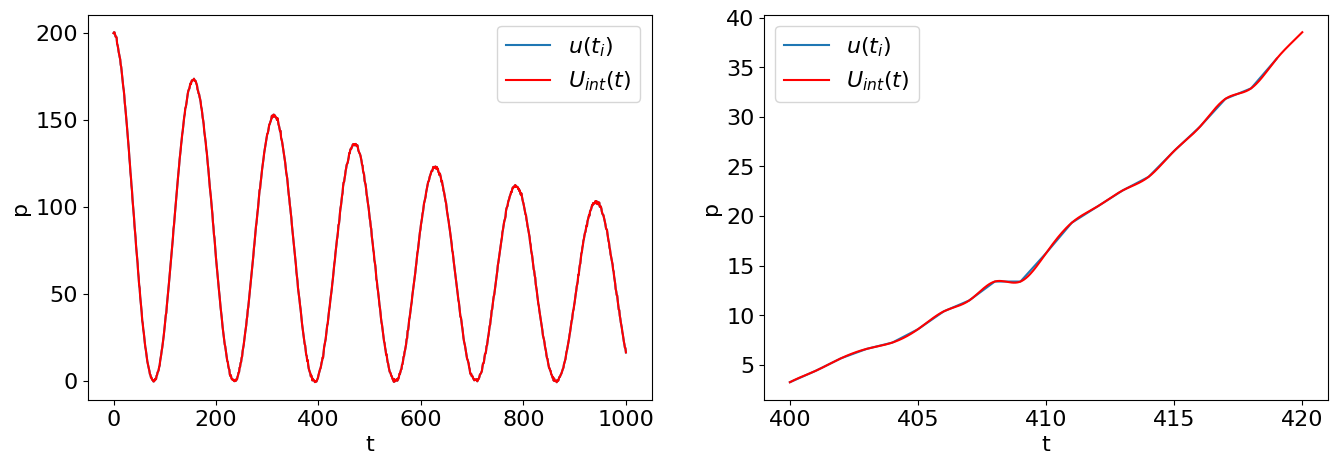

In [19]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Uint(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Uint(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 4.075069238900477')

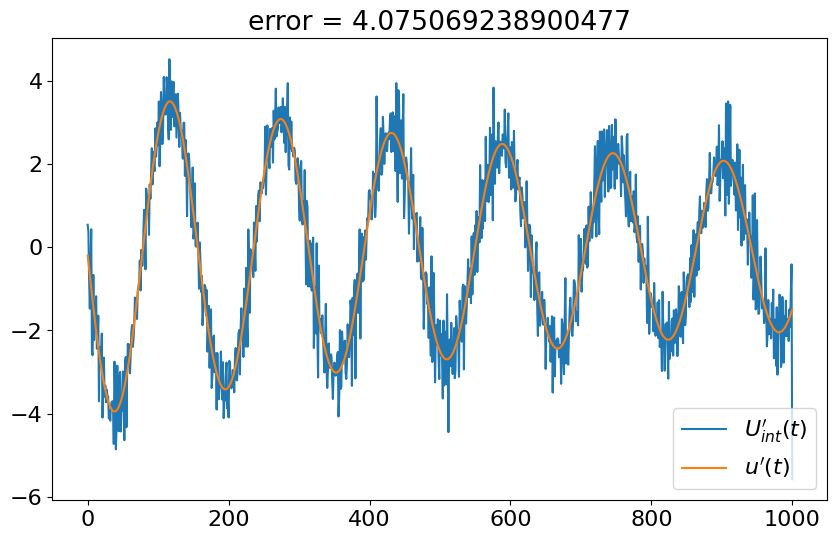

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(t, Uint.derivative()(t), label="$U_{int}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Uint.derivative()(t)).max()))

Интерполирующий сплайн повторяет все отклонения исходной функции из-за шума, но сам является гладкой функцией. Для того чтобы действительно сгладить данные, нужно использовать **UnivariateSpline**

In [21]:
# Параметр s отвечает за сглаживание
Usmooth = UnivariateSpline(t, u, s=100)

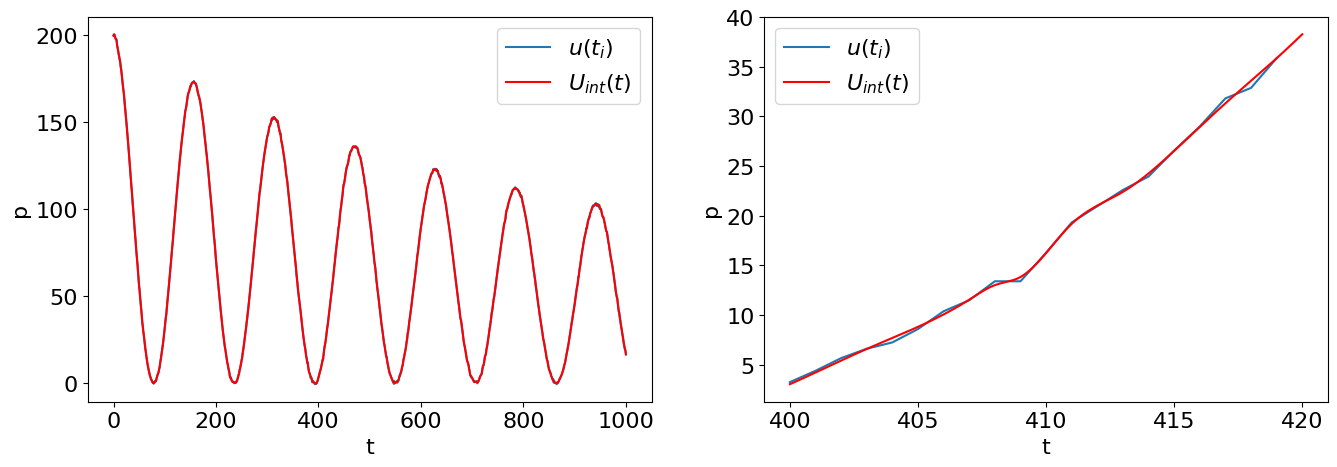

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Usmooth(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Usmooth(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 1.9748494535480392')

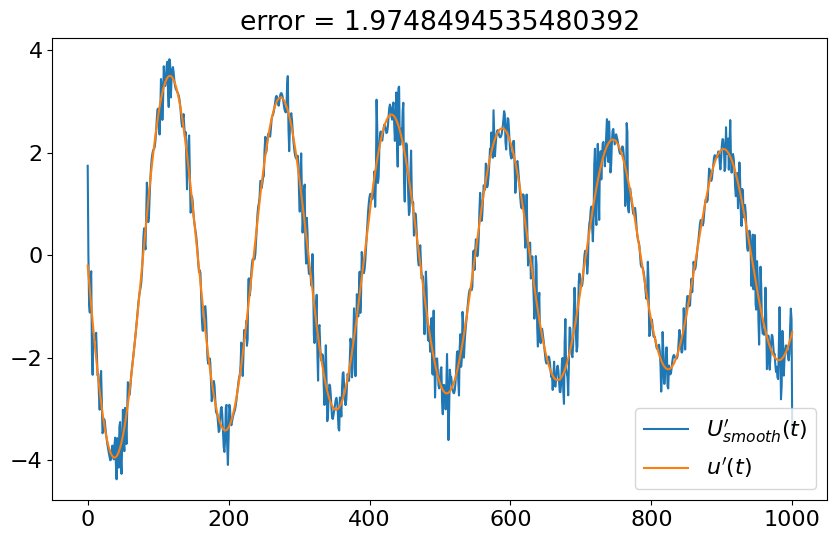

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))

## Задание 2*.



Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = \dots + 0.5 \xi_i, \quad \xi_i \sim \mathcal N(0, 1)$. Экспериментально проверить оптимальность этого значения.

# Задание 3.

При дифференцировании функций имеются два основных источника погрешности

- Ошибка метода - уменьшается при уменьшении $\boldsymbol{h}$

- Ошибка вычислений - растет при уменьшении $\boldsymbol{h}$


Поскольку характер роста ошибок различный, существует некоторое значение $h^{*}$, при котором ошибка минимальна. Рассмотрите полную ошибку
$\varepsilon_{\text {total }}=\varepsilon_{\text {method }}+\varepsilon_{\text {comp }}$
как функцию от $h$ для формулы центральной разности и найдите минимум.

$$
f^{\prime}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$


Максимум модуля пятой  производной в окрестности $x_{0}$ оценивайте как $M_{5}$, ошибку вычисления $f$ как $\Delta f$.

# Задание 4.

Используя сглаженные данные из задания 2, постройте график производной с помощью формулы из задания 3. Сравнить фактическую ошибку вычисления производной с теоретической оценкой из задания 3. Также сравнить, используя для вычисления производной не соседние точки, а точки на расстоянии, определённом из задания 1.

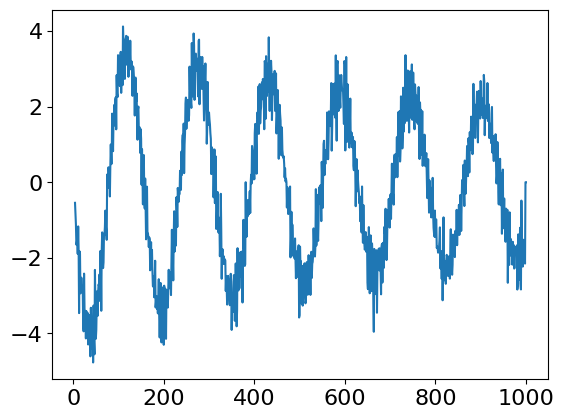

error = 3.4734023229654305


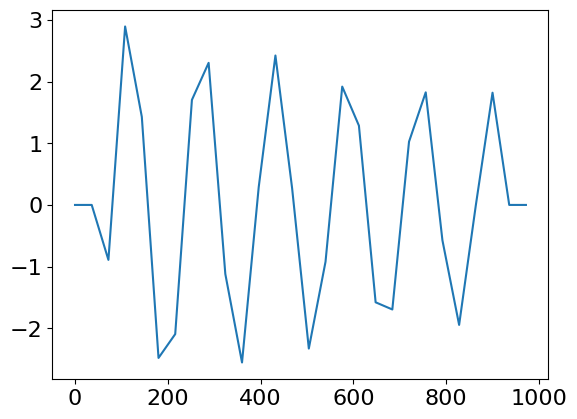

error = 3.875022733175591


In [24]:
f_prime = np.zeros(len(t))
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
for i in range(len(t)-2):
    h = t[1] - t[0]
    f_prime[i] = 1/(12*h)*(u[i-2] - 8*u[i-1] + 8*u[i+1] - u[i+2])
t_prime = np.copy(t[4:])
f_prime = np.copy(f_prime[4:])


plt.plot(t_prime, f_prime,)
plt.show()

print('error = ' + str(np.abs(f_prime - Usmooth.derivative()(t_prime)).max()))


t_2 = np.arange(0,1000,36)
f_2_prime = np.zeros(len(t_2))
for i in range(2, len(t_2) - 2):
    h = 36
    f_2_prime[i] = 1/(12*h)*(u[t_2[i]- h*2] - 8*u[t_2[i]- h] + 8*u[t_2[i]+ h] - u[t_2[i] + h*2])

plt.plot(t_2, f_2_prime)
plt.show()

print('error = ' + str(np.abs(f_2_prime - Usmooth.derivative()(t_2)).max()))



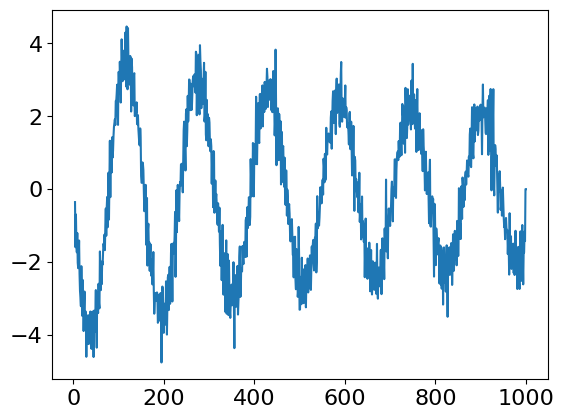

error = 3.4734023229654305


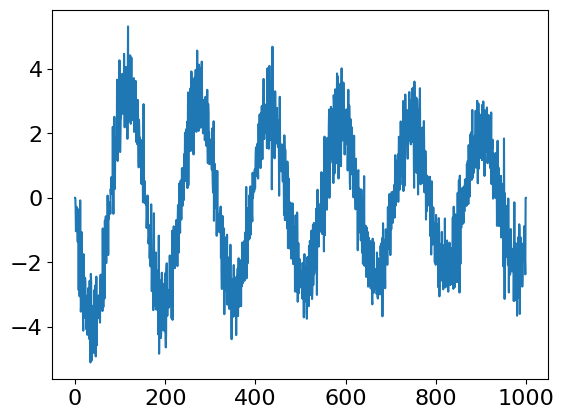

error = 2.47539296186933


In [25]:
f_prime = np.zeros(len(t))
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
for i in range(len(t)-2):
    h = t[1] - t[0]
    f_prime[i] = 1/(12*h)*(u[i-2] - 8*u[i-1] + 8*u[i+1] - u[i+2])
t_prime = np.copy(t[4:])
f_prime = np.copy(f_prime[4:])


plt.plot(t_prime, f_prime,)
plt.show()

print('error = ' + str(np.abs(f_prime - Usmooth.derivative()(t_prime)).max()))


t_2 = np.arange(0,1000,0.6754)
f_2_prime = np.zeros(len(t_2))
u_2 = p0 / (1 + t_2/t0) * (0.5 + 0.5 * np.cos(w0 * t_2)) + 0.5 * np.random.randn(len(t_2))
for i in range(2, len(t_2) - 2):
    h = 0.6754
    f_2_prime[i] = 1/(12*h)*(u_2[i - 2] - 8*u_2[i - 1] + 8*u_2[i + 1] - u_2[i + 2])

plt.plot(t_2, f_2_prime)
plt.show()

print('error = ' + str(np.abs(f_2_prime - Usmooth.derivative()(t_2)).max()))


Теор ошибка: $\varepsilon = 0,729$

# Основы символьных вычислений.



Решим с помощью sympy следующую задачу: найти погрешность метода и неустранимую погрешность при вычислениях производной заданным методом, найти оптимальный шаг численного дифференцирования и минимально возможную ошибку.


$$
f^{(2)}(x)=\frac{f(x+h)-2 f(x)+f(x-h)}{h^2}
$$

In [26]:
# Будем работать в библиотеке аналитических вычислений sympy
#!pip install sympy
import sympy as smp

x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)

f

f(x)

In [27]:
f.series(x, 0, 5)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + O(x**5)

In [28]:
h = smp.symbols('h')

f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)

f_plus_h.series(h, 0, 5)

f(x) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [29]:
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)

f_minus_h.series(h, 0, 5)

f(x) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [30]:
chislitel = f_plus_h.series(h, 0, 5) - 2*f + f_minus_h.series(h, 0, 5)
chislitel

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x) + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/12 + O(h**5)

In [31]:
chislitel.simplify()

h**2*Derivative(f(x), (x, 2)) + h**4*Derivative(f(x), (x, 4))/12 + O(h**5)

In [32]:
(chislitel.simplify()/h**2).simplify()

Derivative(f(x), (x, 2)) + h**2*Derivative(f(x), (x, 4))/12 + O(h**3)

Итого ошибка метода есть

$$
\varepsilon_{\text{method}} = \frac{h^2 M_4}{12}
$$

Т.е. второй порядок аппроксимации

Ошибка округления же

$$
\varepsilon_{\text{round}} = \frac{4 \Delta f}{h^2}
$$

Суммарная погрешность тогда

$$
\varepsilon = \frac{h^2 M_4}{12} + \frac{4 \Delta f }{h^2}
$$

Необходимо аналитически найти её минимум. Опять же используем sympy

In [33]:
M_4, deltaf = smp.symbols(['M_4', 'Δf'])
print(M_4, deltaf)

M_4 Δf


In [34]:
eps = smp.symbols('varepsilon')
eps

varepsilon

In [35]:
eps = h**2*M_4/12 + 4*deltaf/h**2
eps

M_4*h**2/12 + 4*Δf/h**2

In [36]:
eps_derivative = eps.diff(h)
eps_derivative

M_4*h/6 - 8*Δf/h**3

In [37]:
smp.solve(eps_derivative, h)

[-2*3**(1/4)*(Δf/M_4)**(1/4),
 2*3**(1/4)*(Δf/M_4)**(1/4),
 -2*3**(1/4)*I*(Δf/M_4)**(1/4),
 2*3**(1/4)*I*(Δf/M_4)**(1/4)]

Только второе решение положительное действительное

In [38]:
h_opt = smp.solve(eps_derivative, h)[1]
h_opt

2*3**(1/4)*(Δf/M_4)**(1/4)

In [39]:
eps_min = eps.replace(h, h_opt)
eps_min

sqrt(3)*M_4*sqrt(Δf/M_4)/3 + sqrt(3)*Δf/(3*sqrt(Δf/M_4))

In [40]:
eps_min = eps_min.simplify()
eps_min

2*sqrt(3)*Δf/(3*sqrt(Δf/M_4))

# Задание 5.

1) Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку. Используйте SymPy.

$$
f^{(3)}(x)=\frac{f(x+2 h)-2 f(x+h)+2 f(x-h)-f(x-2 h)}{2 h^3}
$$

2) Определите параметр $\alpha$, при котором данная конечная разность приближает первую производную функции. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку. Используйте SymPy.

$$
u^{(1)}(t) = \frac{u(t-2 \tau)- \alpha \cdot  u(t-\tau)+ \alpha \cdot u(t+\tau)-u(t+2 \tau)}{12 \tau}
$$

In [41]:
import numpy as np
x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)
h = smp.symbols('h')

f_minus_2h = smp.symbols('f', cls = smp.Function)(x-2*h)
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)
f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)
f_plus_2h = smp.symbols('f', cls = smp.Function)(x+2*h)


u = 1/(2*h**3)*(f_plus_2h.series(h, 0, 6)- 2*f_plus_h.series(h, 0, 6) + 2*f_minus_h.series(h, 0, 6) - f_minus_2h.series(h, 0, 6))


M_5, deltaf = smp.symbols(['M_5', 'Δf'])
eps = smp.symbols('varepsilon')

eps = h**2*M_5/4 + 3*deltaf/(2*h**5)
eps_derivative = eps.diff(h)
h_answer = smp.solve(eps_derivative, h)[0]
eps = h_answer**2*M_5/4 + 3*deltaf/(2*h_answer**5)
eps

15**(2/7)*M_5*(Δf/M_5)**(2/7)/4 + 15**(2/7)*Δf/(10*(Δf/M_5)**(5/7))

In [42]:
from sympy import init_printing
x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)
h = smp.symbols('h')

f_minus_2h = smp.symbols('f', cls = smp.Function)(x-2*h)
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)
f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)
f_plus_2h = smp.symbols('f', cls = smp.Function)(x+2*h)

i = 8
u = 1/(12*h)*(f_minus_2h.series(h, 0, 6)- i*f_minus_h.series(h, 0, 6) + i*f_plus_h.series(h, 0, 6) - f_plus_2h.series(h, 0, 6))
u.simplify()


Derivative(f(x), x) - h**4*Derivative(f(x), (x, 5))/30 + O(h**5)

In [43]:
M_5, deltaf = smp.symbols(['M_5', 'Δf'])
eps = smp.symbols('varepsilon')
eps = h**4*M_5/30 + 18*deltaf/(144*h)
eps


M_5*h**4/30 + Δf/(8*h)

In [44]:
eps_derivative = eps.diff(h)
h_answer = smp.solve(eps_derivative, h)[0]
h_answer

30**(1/5)*(Δf/M_5)**(1/5)/2

In [45]:
eps = h_answer**2*M_5/4 + 3*deltaf/(2*h_answer**5)
eps

30**(2/5)*M_5*(Δf/M_5)**(2/5)/16 + 8*M_5/5

# Задание 6*.

Напишите программу, которая автоматически определяет порядок аппроксимации. На вход программе подаются только коэффициенты при слагаемых в разностной схеме.

In [46]:
x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)
h = smp.symbols('h')

f_minus_2h = smp.symbols('f', cls = smp.Function)(x-2*h)
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)
f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)
f_plus_2h = smp.symbols('f', cls = smp.Function)(x+2*h)

a = [-1,2,2,-1]
u = (a[0]*f_plus_2h.series(h, 0, 10)- a[1]*f_plus_h.series(h, 0, 10) + a[2]*f_minus_h.series(h, 0, 10) - a[3]*f_minus_2h.series(h, 0, 10))
u.simplify()
u.series(h, 0, 10)

-8*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) - 10*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/3 - 17*h**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/30 - 13*h**7*Subs(Derivative(f(_xi_1), (_xi_1, 7)), _xi_1, x)/252 - 257*h**9*Subs(Derivative(f(_xi_1), (_xi_1, 9)), _xi_1, x)/90720 + O(h**10)

In [47]:
i = 0
coeff = 0
count = 0 
while ((coeff == 0) or (count == 0)):
    coeff = (u.series(h, 0, 10).coeff(h**(i+1)))
    i+=1
    
    if ((coeff != 0) and (count == 0)): 
        count += 1
        coeff = 0
        

print(i-1,"-ый порядок аппроксимации")







2 -ый порядок аппроксимации


# Задание 7.

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Известно, что шума нет.

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

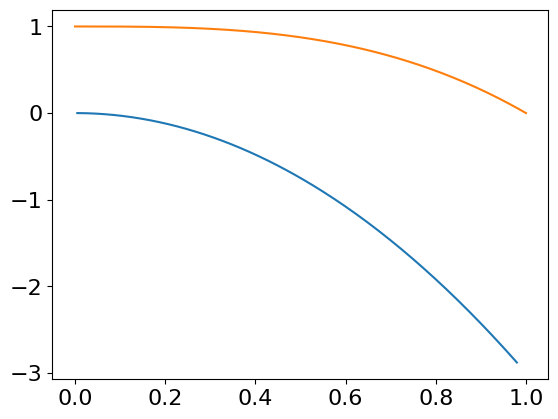

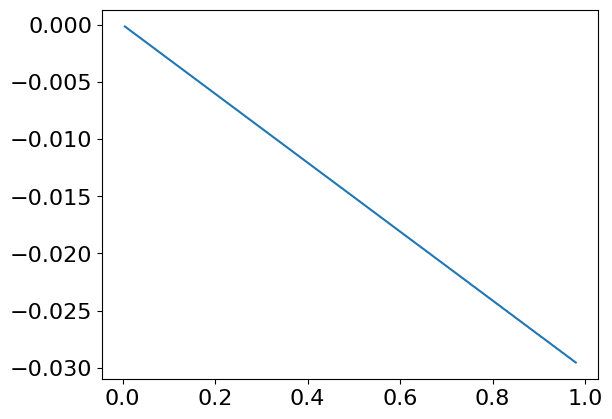

In [48]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
import numpy as np


x_arr = [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.3718593 ,
       0.37688442, 0.38190955, 0.38693467, 0.3919598 , 0.39698492,
       0.40201005, 0.40703518, 0.4120603 , 0.41708543, 0.42211055,
       0.42713568, 0.4321608 , 0.43718593, 0.44221106, 0.44723618,
       0.45226131, 0.45728643, 0.46231156, 0.46733668, 0.47236181,
       0.47738693, 0.48241206, 0.48743719, 0.49246231, 0.49748744,
       0.50251256, 0.50753769, 0.51256281, 0.51758794, 0.52261307,
       0.52763819, 0.53266332, 0.53768844, 0.54271357, 0.54773869,
       0.55276382, 0.55778894, 0.56281407, 0.5678392 , 0.57286432,
       0.57788945, 0.58291457, 0.5879397 , 0.59296482, 0.59798995,
       0.60301508, 0.6080402 , 0.61306533, 0.61809045, 0.62311558,
       0.6281407 , 0.63316583, 0.63819095, 0.64321608, 0.64824121,
       0.65326633, 0.65829146, 0.66331658, 0.66834171, 0.67336683,
       0.67839196, 0.68341709, 0.68844221, 0.69346734, 0.69849246,
       0.70351759, 0.70854271, 0.71356784, 0.71859296, 0.72361809,
       0.72864322, 0.73366834, 0.73869347, 0.74371859, 0.74874372,
       0.75376884, 0.75879397, 0.7638191 , 0.76884422, 0.77386935,
       0.77889447, 0.7839196 , 0.78894472, 0.79396985, 0.79899497,
       0.8040201 , 0.80904523, 0.81407035, 0.81909548, 0.8241206 ,
       0.82914573, 0.83417085, 0.83919598, 0.84422111, 0.84924623,
       0.85427136, 0.85929648, 0.86432161, 0.86934673, 0.87437186,
       0.87939698, 0.88442211, 0.88944724, 0.89447236, 0.89949749,
       0.90452261, 0.90954774, 0.91457286, 0.91959799, 0.92462312,
       0.92964824, 0.93467337, 0.93969849, 0.94472362, 0.94974874,
       0.95477387, 0.95979899, 0.96482412, 0.96984925, 0.97487437,
       0.9798995 , 0.98492462, 0.98994975, 0.99497487, 1.        ]

y_arr = [1.        , 0.99999987, 0.99999898, 0.99999657, 0.99999188,
       0.99998414, 0.99997259, 0.99995648, 0.99993503, 0.99990749,
       0.99987311, 0.9998311 , 0.99978073, 0.99972121, 0.9996518 ,
       0.99957173, 0.99948024, 0.99937657, 0.99925995, 0.99912963,
       0.99898485, 0.99882484, 0.99864883, 0.99845608, 0.99824582,
       0.99801728, 0.99776971, 0.99750235, 0.99721442, 0.99690518,
       0.99657386, 0.9962197 , 0.99584194, 0.99543981, 0.99501256,
       0.99455942, 0.99407964, 0.99357244, 0.99303708, 0.99247278,
       0.99187879, 0.99125435, 0.99059868, 0.98991105, 0.98919067,
       0.98843679, 0.98764865, 0.98682549, 0.98596655, 0.98507106,
       0.98413826, 0.9831674 , 0.9821577 , 0.98110842, 0.98001878,
       0.97888803, 0.9777154 , 0.97650014, 0.97524148, 0.97393866,
       0.97259092, 0.97119749, 0.96975763, 0.96827056, 0.96673552,
       0.96515176, 0.96351851, 0.96183501, 0.9601005 , 0.95831421,
       0.95647539, 0.95458327, 0.9526371 , 0.95063611, 0.94857954,
       0.94646663, 0.94429662, 0.94206875, 0.93978224, 0.93743636,
       0.93503032, 0.93256337, 0.93003476, 0.92744371, 0.92478947,
       0.92207128, 0.91928837, 0.91643998, 0.91352535, 0.91054373,
       0.90749434, 0.90437643, 0.90118924, 0.897932  , 0.89460395,
       0.89120434, 0.88773239, 0.88418735, 0.88056847, 0.87687497,
       0.87310609, 0.86926108, 0.86533917, 0.8613396 , 0.85726161,
       0.85310444, 0.84886732, 0.84454951, 0.84015022, 0.83566871,
       0.83110421, 0.82645596, 0.8217232 , 0.81690516, 0.81200109,
       0.80701023, 0.80193181, 0.79676507, 0.79150925, 0.78616359,
       0.78072732, 0.7751997 , 0.76957995, 0.76386732, 0.75806103,
       0.75216034, 0.74616447, 0.74007268, 0.73388419, 0.72759824,
       0.72121409, 0.71473095, 0.70814808, 0.7014647 , 0.69468007,
       0.6877934 , 0.68080395, 0.67371097, 0.66651367, 0.65921131,
       0.65180311, 0.64428834, 0.6366662 , 0.62893596, 0.62109682,
       0.61314806, 0.60508891, 0.59691858, 0.58863635, 0.58024142,
       0.57173307, 0.56311049, 0.55437295, 0.5455197 , 0.53654994,
       0.52746295, 0.51825794, 0.50893416, 0.49949084, 0.48992723,
       0.48024256, 0.47043606, 0.460507  , 0.45045459, 0.44027809,
       0.4299767 , 0.41954972, 0.40899632, 0.39831578, 0.38750735,
       0.37657023, 0.36550369, 0.35430695, 0.34297927, 0.33151985,
       0.31992798, 0.30820284, 0.29634371, 0.28434984, 0.27222042,
       0.25995474, 0.24755199, 0.23501146, 0.22233234, 0.20951388,
       0.19655537, 0.18345597, 0.17021499, 0.1568316 , 0.14330511,
       0.12963469, 0.11581964, 0.10185914, 0.08775246, 0.07349886,
       0.05909753, 0.04454776, 0.02984874, 0.01499976, 0.        ]
x = np.array(x_arr)
y = np.array(y_arr)
y_prime_1 = np.zeros(len(x-2))
for i in range(1, len(x)-2):
    h = x[1] - x[0]
    y_prime_1[i] = 1/(2*h)*(y[i+1] - y[i-1])
plt.plot(x[1:(len(x)-4)], y_prime_1[1:(len(y_prime_1)-4)])
plt.plot(x, y)
plt.show()

y_prime_2 = np.zeros(len(x-2))
for i in range(1, len(x)-2):
    h = x[1] - x[0]
    y_prime_2[i] = 1/(h)*(y[i+1] + y[i-1] - 2*y[i])
plt.plot(x[1:(len(x)-4)], y_prime_2[1:(len(y_prime_2)-4)])

# Задание 8.

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Данные теперь щашумлены ;).

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

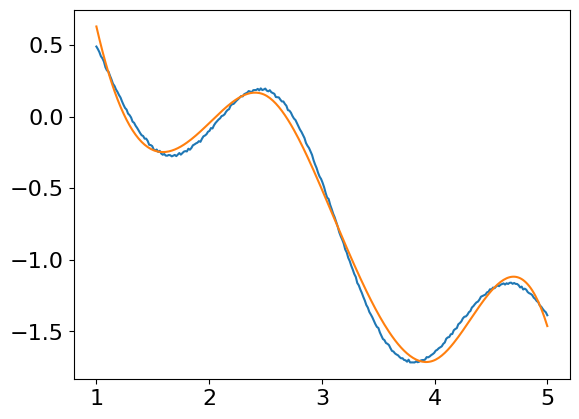

In [180]:
x_arr = [1.        , 1.01337793, 1.02675585, 1.04013378, 1.05351171,
       1.06688963, 1.08026756, 1.09364548, 1.10702341, 1.12040134,
       1.13377926, 1.14715719, 1.16053512, 1.17391304, 1.18729097,
       1.2006689 , 1.21404682, 1.22742475, 1.24080268, 1.2541806 ,
       1.26755853, 1.28093645, 1.29431438, 1.30769231, 1.32107023,
       1.33444816, 1.34782609, 1.36120401, 1.37458194, 1.38795987,
       1.40133779, 1.41471572, 1.42809365, 1.44147157, 1.4548495 ,
       1.46822742, 1.48160535, 1.49498328, 1.5083612 , 1.52173913,
       1.53511706, 1.54849498, 1.56187291, 1.57525084, 1.58862876,
       1.60200669, 1.61538462, 1.62876254, 1.64214047, 1.65551839,
       1.66889632, 1.68227425, 1.69565217, 1.7090301 , 1.72240803,
       1.73578595, 1.74916388, 1.76254181, 1.77591973, 1.78929766,
       1.80267559, 1.81605351, 1.82943144, 1.84280936, 1.85618729,
       1.86956522, 1.88294314, 1.89632107, 1.909699  , 1.92307692,
       1.93645485, 1.94983278, 1.9632107 , 1.97658863, 1.98996656,
       2.00334448, 2.01672241, 2.03010033, 2.04347826, 2.05685619,
       2.07023411, 2.08361204, 2.09698997, 2.11036789, 2.12374582,
       2.13712375, 2.15050167, 2.1638796 , 2.17725753, 2.19063545,
       2.20401338, 2.2173913 , 2.23076923, 2.24414716, 2.25752508,
       2.27090301, 2.28428094, 2.29765886, 2.31103679, 2.32441472,
       2.33779264, 2.35117057, 2.36454849, 2.37792642, 2.39130435,
       2.40468227, 2.4180602 , 2.43143813, 2.44481605, 2.45819398,
       2.47157191, 2.48494983, 2.49832776, 2.51170569, 2.52508361,
       2.53846154, 2.55183946, 2.56521739, 2.57859532, 2.59197324,
       2.60535117, 2.6187291 , 2.63210702, 2.64548495, 2.65886288,
       2.6722408 , 2.68561873, 2.69899666, 2.71237458, 2.72575251,
       2.73913043, 2.75250836, 2.76588629, 2.77926421, 2.79264214,
       2.80602007, 2.81939799, 2.83277592, 2.84615385, 2.85953177,
       2.8729097 , 2.88628763, 2.89966555, 2.91304348, 2.9264214 ,
       2.93979933, 2.95317726, 2.96655518, 2.97993311, 2.99331104,
       3.00668896, 3.02006689, 3.03344482, 3.04682274, 3.06020067,
       3.0735786 , 3.08695652, 3.10033445, 3.11371237, 3.1270903 ,
       3.14046823, 3.15384615, 3.16722408, 3.18060201, 3.19397993,
       3.20735786, 3.22073579, 3.23411371, 3.24749164, 3.26086957,
       3.27424749, 3.28762542, 3.30100334, 3.31438127, 3.3277592 ,
       3.34113712, 3.35451505, 3.36789298, 3.3812709 , 3.39464883,
       3.40802676, 3.42140468, 3.43478261, 3.44816054, 3.46153846,
       3.47491639, 3.48829431, 3.50167224, 3.51505017, 3.52842809,
       3.54180602, 3.55518395, 3.56856187, 3.5819398 , 3.59531773,
       3.60869565, 3.62207358, 3.63545151, 3.64882943, 3.66220736,
       3.67558528, 3.68896321, 3.70234114, 3.71571906, 3.72909699,
       3.74247492, 3.75585284, 3.76923077, 3.7826087 , 3.79598662,
       3.80936455, 3.82274247, 3.8361204 , 3.84949833, 3.86287625,
       3.87625418, 3.88963211, 3.90301003, 3.91638796, 3.92976589,
       3.94314381, 3.95652174, 3.96989967, 3.98327759, 3.99665552,
       4.01003344, 4.02341137, 4.0367893 , 4.05016722, 4.06354515,
       4.07692308, 4.090301  , 4.10367893, 4.11705686, 4.13043478,
       4.14381271, 4.15719064, 4.17056856, 4.18394649, 4.19732441,
       4.21070234, 4.22408027, 4.23745819, 4.25083612, 4.26421405,
       4.27759197, 4.2909699 , 4.30434783, 4.31772575, 4.33110368,
       4.34448161, 4.35785953, 4.37123746, 4.38461538, 4.39799331,
       4.41137124, 4.42474916, 4.43812709, 4.45150502, 4.46488294,
       4.47826087, 4.4916388 , 4.50501672, 4.51839465, 4.53177258,
       4.5451505 , 4.55852843, 4.57190635, 4.58528428, 4.59866221,
       4.61204013, 4.62541806, 4.63879599, 4.65217391, 4.66555184,
       4.67892977, 4.69230769, 4.70568562, 4.71906355, 4.73244147,
       4.7458194 , 4.75919732, 4.77257525, 4.78595318, 4.7993311 ,
       4.81270903, 4.82608696, 4.83946488, 4.85284281, 4.86622074,
       4.87959866, 4.89297659, 4.90635452, 4.91973244, 4.93311037,
       4.94648829, 4.95986622, 4.97324415, 4.98662207, 5.        ]

y_arr = [ 0.48863805,  0.4706063 ,  0.4493648 ,  0.42075058,  0.40608114,
        0.38294133,  0.34397085,  0.32196163,  0.3140574 ,  0.28508636,
        0.2590824 ,  0.22879908,  0.21364165,  0.18871463,  0.17157309,
        0.14975436,  0.13267386,  0.1054287 ,  0.08140074,  0.05995963,
        0.04864072,  0.02048689,  0.00986834, -0.00683534, -0.03565149,
       -0.04383209, -0.06428567, -0.07931248, -0.09793194, -0.11519411,
       -0.13062949, -0.1359394 , -0.15451834, -0.15434391, -0.16995244,
       -0.19729437, -0.19916606, -0.20620754, -0.23002474, -0.23628555,
       -0.23047724, -0.24710707, -0.23942271, -0.25857637, -0.26678739,
       -0.26170215, -0.27284519, -0.27340328, -0.26849006, -0.27058684,
       -0.27805442, -0.27266571, -0.26813815, -0.27644061, -0.26521816,
       -0.25489861, -0.26611842, -0.25564442, -0.2452349 , -0.24137907,
       -0.24394094, -0.22478145, -0.23174912, -0.21952174, -0.20088855,
       -0.19503158, -0.18768235, -0.18261683, -0.17177333, -0.17668631,
       -0.15533076, -0.13822566, -0.13259038, -0.12373451, -0.10640144,
       -0.10027304, -0.0804523 , -0.08328208, -0.06070371, -0.04482286,
       -0.03343396, -0.02100707, -0.01258064,  0.00276372,  0.00705245,
        0.01533925,  0.03351731,  0.04558241,  0.05157895,  0.07602384,
        0.0857951 ,  0.08844834,  0.10029526,  0.11172865,  0.12137859,
        0.1322108 ,  0.14310398,  0.14042411,  0.15600623,  0.16158499,
        0.16661173,  0.17795138,  0.17420817,  0.16943876,  0.18398173,
        0.18447575,  0.18538053,  0.19310823,  0.18246343,  0.19667835,
        0.18487044,  0.18879618,  0.19523542,  0.18077048,  0.17602092,
        0.18393253,  0.16944479,  0.16357239,  0.15855583,  0.13623582,
        0.13497459,  0.13340937,  0.11753257,  0.10511337,  0.10509054,
        0.0877562 ,  0.07505764,  0.04466765,  0.04106671,  0.02698227,
        0.00408617, -0.01386932, -0.02437554, -0.04616   , -0.06965996,
       -0.09103768, -0.10782492, -0.12915359, -0.15054097, -0.18511282,
       -0.2045241 , -0.2199459 , -0.24437012, -0.26786494, -0.30492996,
       -0.33444034, -0.35923335, -0.39254697, -0.41916829, -0.43605909,
       -0.46252906, -0.49371472, -0.53304183, -0.56596648, -0.57574361,
       -0.61592146, -0.64552114, -0.67802708, -0.70343358, -0.73581649,
       -0.76749808, -0.80706539, -0.83514307, -0.85887137, -0.88694473,
       -0.92814296, -0.94889084, -0.98639813, -1.00937506, -1.04211274,
       -1.06868071, -1.09937414, -1.11997578, -1.16238816, -1.17877914,
       -1.20729979, -1.23115284, -1.25959016, -1.28481186, -1.3161271 ,
       -1.33420269, -1.36471453, -1.38270606, -1.40226966, -1.42646112,
       -1.44956427, -1.46870423, -1.47649288, -1.50829415, -1.53101375,
       -1.55332363, -1.56095535, -1.58092825, -1.58682895, -1.59585189,
       -1.6174715 , -1.63632323, -1.64085533, -1.65408224, -1.66148126,
       -1.66693371, -1.67880729, -1.68812533, -1.68746128, -1.69957483,
       -1.70198022, -1.71196058, -1.69797514, -1.71677912, -1.71644881,
       -1.71677748, -1.71727519, -1.70944014, -1.71558185, -1.71203251,
       -1.70384492, -1.70050829, -1.70057077, -1.69670383, -1.67977146,
       -1.68155394, -1.67529224, -1.66600175, -1.65911615, -1.65036756,
       -1.63486243, -1.62892397, -1.61816981, -1.61123198, -1.60474294,
       -1.58733502, -1.57801458, -1.5516538 , -1.54236321, -1.53941575,
       -1.52009207, -1.51827931, -1.49223717, -1.48353035, -1.47737445,
       -1.45020072, -1.44214587, -1.43053664, -1.40968572, -1.39821305,
       -1.39563639, -1.38451407, -1.36636951, -1.35802387, -1.33351002,
       -1.32367539, -1.30984424, -1.29798304, -1.29223666, -1.2780077 ,
       -1.25809695, -1.25328938, -1.24915647, -1.243037  , -1.22771404,
       -1.22354855, -1.20605964, -1.20801043, -1.19416947, -1.19887309,
       -1.18742172, -1.17901188, -1.18459576, -1.17420289, -1.16945966,
       -1.16534322, -1.17333321, -1.16421488, -1.16911536, -1.16131656,
       -1.15992369, -1.16795747, -1.16239026, -1.16862322, -1.16913217,
       -1.17802895, -1.19333929, -1.18737164, -1.20780522, -1.20185831,
       -1.20855227, -1.22559971, -1.23378326, -1.23833275, -1.24691611,
       -1.26466511, -1.27370955, -1.28863025, -1.29633105, -1.31891104,
       -1.32804598, -1.34375795, -1.35719863, -1.3663852 , -1.38759841]

x = np.array(x_arr)
y = np.array(y_arr)
y_prime_1 = np.zeros(len(x) - 8)
Usmooth = UnivariateSpline(x, y, s=1)


plt.plot(x,y)
plt.plot(x,Usmooth(x))
plt.show()






Функция не так хорошо приближается сплайном, так что найдем дифф по-другому

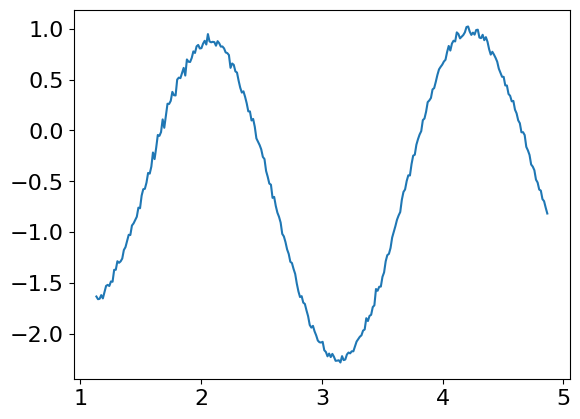

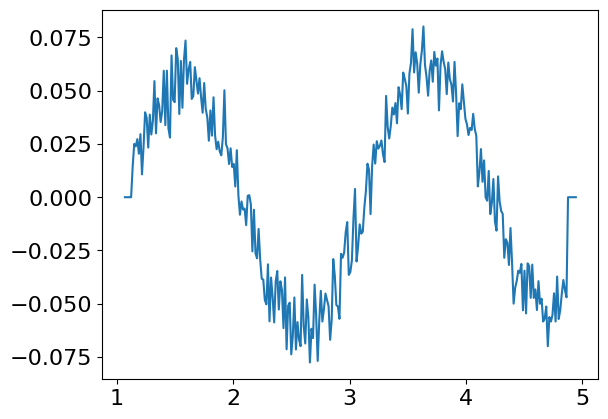

In [181]:
y_prime_1 = np.zeros(len(x))
for i in range(10, len(x)-10):
    h = x[1] - x[0]
    y_prime_1[i] = 1/(28*h)*(-y[i - 10] + y[i+10] - y[i-4] + y[i+4])
plt.plot(x[10:(len(x)-10)], y_prime_1[10:(len(y_prime_1)-10)])

plt.show()

y_prime_2 = np.zeros(len(x))
for i in range(10, len(x)-10):
    h = x[1] - x[0]
    y_prime_2[i] = 1/(100*h)*(y[i+10] + y[i-10] - 2*y[i])
plt.plot(x[5:(len(y_prime_2)-4)], y_prime_2[5:(len(y_prime_2)-4)])



In [182]:
x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)
h = smp.symbols('h')

f_1 = smp.symbols('f', cls = smp.Function)(x + 4*h)
f_2 = smp.symbols('f', cls = smp.Function)(x)
f_3 = smp.symbols('f', cls = smp.Function)(x - 4*h)
u = (f_1 - 2*f_2 + f_3)/(100*h**2)
u.simplify()



(-2*f(x) + f(-4*h + x) + f(4*h + x))/(100*h**2)

In [169]:
f_1 = smp.symbols('f', cls = smp.Function)(x - 10*h)
f_2 = smp.symbols('f', cls = smp.Function)(x - 4*h)
f_3 = smp.symbols('f', cls = smp.Function)(x + 4*h)
f_4 = smp.symbols('f', cls = smp.Function)(x + 10*h)
u = (-f_1 - f_2 + f_3 + f_4)/(28*h)
u.simplify()

(-f(-10*h + x) - f(-4*h + x) + f(4*h + x) + f(10*h + x))/(28*h)

In [170]:
u = (-f_1.series(h) - f_2.series(h) + f_3.series(h) + f_4.series(h))/(28*h)
u.simplify()

Derivative(f(x), x) + 38*h**2*Derivative(f(x), (x, 3))/3 + 902*h**4*Derivative(f(x), (x, 5))/15 + O(h**5)

In [176]:
f_1 = smp.symbols('f', cls = smp.Function)(x - 10*h)
f_2 = smp.symbols('f', cls = smp.Function)(x + 10*h)
f_3 = smp.symbols('f', cls = smp.Function)(x)

u = (f_1 + f_2 - 2*f_3)/(100*h)
u.simplify()

(-2*f(x) + f(-10*h + x) + f(10*h + x))/(100*h)

In [177]:
u = (f_1.series(h) + f_2.series(h) - 2*f_3.series(h) )/(100*h**2)
u.simplify()

Derivative(f(x), (x, 2)) + 25*h**2*Derivative(f(x), (x, 4))/3 + O(h**4)